In [1]:
#The only thing to include in the paper/presentation from this code is the bar graph
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
#import wfdb
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from time import time
import timeit

random.seed(1000)

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\LMS-Khatrib\AppData\Local\Temp\ipykernel_12684\3159236473.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# Side to side comparison plots

In [3]:
statallfeatures_dic = {
    'Run Time': [],
    'Accuracy': [],   ## To store the MEAN accuracy for 5-fold CV for each model
    'Standard Error': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1_Score': []   
}

In [4]:
## To store the accuracy for 5-fold CV for each model
indaccs_dic = {}

2017 train -> 2021 test

In [5]:
test1_df = pd.read_csv('SRER_2017_training_bi.csv', na_values='?').dropna()
train1_df = pd.read_csv('JORN17_dataset_v2.csv', na_values='?').dropna()
test_df = test1_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"])
train_df= train1_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"])
bigtest1_df = pd.read_csv('SRER17_pred.csv', na_values='?')
bg1 = bigtest1_df.drop(columns=["Veg_class"])
#OID__x,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_max,ARVI_med,EVI_mean,EVI_max,EVI_med,NDVI_mean,NDVI_max,NDVI_med,SAVI_mean,SAVI_max,SAVI_med,Veg_class
bigtest_df = bg1.dropna()
bigtest_df = bigtest_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"]).fillna(0)

In [6]:
#Logistic Regression

kf = KFold(n_splits=5, random_state=3, shuffle=True)
model = LogisticRegression(solver='liblinear')

start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

testindex8 = []
testindex9 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]

    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)

    testindex8.append(test_index)
    testindex9.append(pred_values)
    
elapsed = timeit.default_timer() - start_time



print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LogReg']=acc_score

---Run time is 0.029562800000000777 seconds ---

Accuracy of each fold: 
 [0.6962264150943396, 0.7, 0.7320754716981132, 0.7169811320754716, 0.722117202268431]
Avg accuracy: 0.7134800442272711
Std of accuracy : 
0.013505904994468661

[[ 521  456]
 [ 303 1369]]

              precision    recall  f1-score   support

   non-woody       0.63      0.53      0.58       977
       woody       0.75      0.82      0.78      1672

    accuracy                           0.71      2649
   macro avg       0.69      0.68      0.68      2649
weighted avg       0.71      0.71      0.71      2649

0.5332650972364381
0.81877990430622
0.6322815533980582
0.5785674625208218


In [7]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[1731  357]
 [1072 1179]]

              precision    recall  f1-score   support

   non-woody       0.62      0.83      0.71      2088
       woody       0.77      0.52      0.62      2251

    accuracy                           0.67      4339
   macro avg       0.69      0.68      0.67      4339
weighted avg       0.70      0.67      0.66      4339

predicted ['woody' 'woody' 'non-woody' ... 'woody' 'woody' 'woody']
acc 0.6706614427287393
sens  0.5237672145713016
spec  0.8290229885057471
prec  0.6175526221905102
f1_score  0.7078307094663668


In [8]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted


In [9]:
bigtest_df.dtypes

OID_              int64
Id                int64
gridcode          int64
Shape_Length    float64
Shape_Area      float64
CH_mean         float64
ARVI_mean       float64
ARVI_max        float64
ARVI_med        float64
EVI_mean        float64
EVI_max         float64
EVI_med         float64
NDVI_mean       float64
NDVI_max        float64
NDVI_med        float64
SAVI_mean       float64
SAVI_max        float64
SAVI_med        float64
Veg_class        object
dtype: object

In [10]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[0:207188]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog1 = woodyarea / totalarea * 100

624339.2799997175
1220676.2000002437
1845015.4800000053


In [11]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[207188:414377]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog2 = woodyarea / totalarea * 100

523587.0000004236
1321431.2099995627
1845018.2100000049


In [12]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[414377:621565]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog3 = woodyarea / totalarea * 100

1007535.7600003883
837479.719999557
1845015.4800000053


In [13]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[621565:828754]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog4 = woodyarea / totalarea * 100

1558978.1899998973
286040.02000009664
1845018.2100000049


In [14]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[828754:1035942]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog5 = woodyarea / totalarea * 100

1688705.9799999783
156309.50000002363
1845015.4800000053


In [15]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1035942:1243131]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog6 = woodyarea / totalarea * 100

1632692.3500001016
212325.85999989152
1845018.2100000049


In [16]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1243131:1450319]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog7 = woodyarea / totalarea * 100

1685699.8500000746
159315.62999992722
1845015.4800000053


In [17]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1450319:1657508]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClog8 = woodyarea / totalarea * 100

1754430.6000000683
90587.60999993478
1845018.2100000049


In [18]:
FWClog = (FWClog1 +FWClog2 +FWClog3+FWClog4+FWClog5+FWClog6+FWClog7+FWClog8) /8
print(woody)
print(nw)
print(FWClog)

196440
10749
70.97474946877419


In [19]:
#LDA
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=LinearDiscriminantAnalysis()

acc_score = []
Truth = []
Output = []

testindex1 = []
testindex2 = []
for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]


    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex1.append(test_index)
    testindex2.append(pred_values)

elapsed = timeit.default_timer() - start_time



print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LDA']=acc_score

---Run time is 37.953202700000006 seconds ---

Accuracy of each fold: 
 [0.7320754716981132, 0.7566037735849057, 0.779245283018868, 0.7679245283018868, 0.77882797731569]
Avg accuracy: 0.7629354067838927
Std of accuracy : 
0.017526564791166103

[[ 628  349]
 [ 279 1393]]

              precision    recall  f1-score   support

   non-woody       0.69      0.64      0.67       977
       woody       0.80      0.83      0.82      1672

    accuracy                           0.76      2649
   macro avg       0.75      0.74      0.74      2649
weighted avg       0.76      0.76      0.76      2649

0.6427840327533265
0.8331339712918661
0.6923925027563396
0.6666666666666666


In [20]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[1849  239]
 [1318  933]]

              precision    recall  f1-score   support

   non-woody       0.58      0.89      0.70      2088
       woody       0.80      0.41      0.55      2251

    accuracy                           0.64      4339
   macro avg       0.69      0.65      0.62      4339
weighted avg       0.69      0.64      0.62      4339

predicted ['woody' 'woody' 'non-woody' ... 'non-woody' 'woody' 'woody']
acc 0.6411615579626642
sens  0.4144824522434474
spec  0.8855363984674329
prec  0.583833280707294
f1_score  0.7037107516650809


In [21]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [22]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[0:207188]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda1 = woodyarea / totalarea * 100

495388.3299996154
1349627.1500003561
1845015.4800000053


In [23]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[207188:414377]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda2 = woodyarea / totalarea * 100

520450.57000019815
1324567.6399997917
1845018.2100000049


In [24]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[414377:621565]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda3 = woodyarea / totalarea * 100

861957.7100003702
983057.7699995736
1845015.4800000053


In [25]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[621565:828754]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda4 = woodyarea / totalarea * 100

1153699.2699996002
691318.9400003398
1845018.2100000049


In [26]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[828754:1035942]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda5 = woodyarea / totalarea * 100

1528265.7800000422
316749.6999999483
1845015.4800000053


In [27]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1035942:1243131]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda6 = woodyarea / totalarea * 100

1469551.9199997436
375466.2900002432
1845018.2100000049


In [28]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1243131:1450319]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda7 = woodyarea / totalarea * 100

1593172.05999987
251843.42000011925
1845015.4800000053


In [29]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1450319:1657508]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWClda8 = woodyarea / totalarea * 100

1658902.4600002253
186115.74999977322
1845018.2100000049


In [30]:
FWClda = (FWClda1 +FWClda2 +FWClda3+FWClda4+FWClda5+FWClda6+FWClda7+FWClda8) /8
print(woody)
print(nw)
print(FWClda)

184477
22712
62.881457461927056


In [31]:
#QDA
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=QuadraticDiscriminantAnalysis()

acc_score = []
Truth = []
Output = []

testindex3 = []
testindex4 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]


    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)


    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    #makes the list for FWC
    testindex3.append(test_index)
    testindex4.append(pred_values)

elapsed = timeit.default_timer() - start_time


print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['QDA']=acc_score

---Run time is 76.2307724 seconds ---

Accuracy of each fold: 
 [0.6981132075471698, 0.7226415094339622, 0.6547169811320754, 0.6547169811320754, 0.6805293005671077]
Avg accuracy: 0.6821435959624782
Std of accuracy : 
0.026085067918039904

[[861 116]
 [726 946]]

              precision    recall  f1-score   support

   non-woody       0.54      0.88      0.67       977
       woody       0.89      0.57      0.69      1672

    accuracy                           0.68      2649
   macro avg       0.72      0.72      0.68      2649
weighted avg       0.76      0.68      0.68      2649

0.8812691914022518
0.5657894736842105
0.5425330812854442
0.671606864274571


In [32]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[1798  290]
 [1293  958]]

              precision    recall  f1-score   support

   non-woody       0.58      0.86      0.69      2088
       woody       0.77      0.43      0.55      2251

    accuracy                           0.64      4339
   macro avg       0.67      0.64      0.62      4339
weighted avg       0.68      0.64      0.62      4339

predicted ['woody' 'woody' 'non-woody' ... 'woody' 'woody' 'woody']
acc 0.6351693938695552
sens  0.4255886272767659
spec  0.8611111111111112
prec  0.5816887738595924
f1_score  0.6943425371693378


In [33]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted


In [34]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[0:207188]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda1 = woodyarea / totalarea * 100

796382.9899999241
1048632.490000018
1845015.4800000053


In [35]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[207188:414377]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda2 = woodyarea / totalarea * 100

705249.6000001444
1139768.609999804
1845018.2100000049


In [36]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[414377:621565]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda3 = woodyarea / totalarea * 100

1057788.900000167
787226.5799997752
1845015.4800000053


In [37]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[621565:828754]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda4 = woodyarea / totalarea * 100

1217780.74999996
627237.4599999937
1845018.2100000049


In [38]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[828754:1035942]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda5 = woodyarea / totalarea * 100

1450758.620000079
394256.8599999025
1845015.4800000053


In [39]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1035942:1243131]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda6 = woodyarea / totalarea * 100

1432404.9299999995
412613.2799999822
1845018.2100000049


In [40]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1243131:1450319]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda7 = woodyarea / totalarea * 100

1491563.550000108
353451.9299998606
1845015.4800000053


In [41]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1450319:1657508]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCqda8 = woodyarea / totalarea * 100

1633341.9300000926
211676.2799999036
1845018.2100000049


In [42]:
FWCqda = (FWCqda1 +FWCqda2 +FWCqda3+FWCqda4+FWCqda5+FWCqda6+FWCqda7+FWCqda8) /8
print(woody)
print(nw)
print(FWCqda)

179625
27564
66.29526956804585


#KNN-CV
KNN_result = []
X=subject_df.iloc[:, 2:17]
Y=subject_df.iloc[:, -1]
crossvalidation = KFold(n_splits=5, random_state=3, shuffle=True)
KNNResult = []
for k in range(1,26):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X, Y)
    scores=cross_val_score(model, X, Y, cv=crossvalidation)
    print('K={}'.format(k))
    print()
    print('Accuracy of each fold: \n {}'.format(scores))
    print()
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    KNN_result.append(scores.mean())
print(KNN_result)

In [43]:
KNN_result = []
X=train_df.iloc[:, 5:18]
Y=train_df.iloc[:, -1]
crossvalidation = KFold(n_splits=5, random_state=3, shuffle=True)
KNNResult = []
for k in range(1,11):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X, Y)
    scores=cross_val_score(model, X, Y, cv=crossvalidation)
    print('K={}'.format(k))
    print()
    print('Accuracy of each fold: \n {}'.format(scores))
    print()
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    KNN_result.append(scores.mean())
print(KNN_result)

K=1

Accuracy of each fold: 
 [0.72641509 0.70943396 0.72641509 0.73773585 0.72022684]

Avg accuracy: 0.7240453686200377

K=2

Accuracy of each fold: 
 [0.68867925 0.69811321 0.70754717 0.68679245 0.6899811 ]

Avg accuracy: 0.6942226343760032

K=3

Accuracy of each fold: 
 [0.72075472 0.73773585 0.76981132 0.73396226 0.74858223]

Avg accuracy: 0.742169276313443

K=4

Accuracy of each fold: 
 [0.70754717 0.75471698 0.74339623 0.70188679 0.73913043]

Avg accuracy: 0.7293355209187858

K=5

Accuracy of each fold: 
 [0.73396226 0.75471698 0.77735849 0.72830189 0.75803403]

Avg accuracy: 0.7504747298213076

K=6

Accuracy of each fold: 
 [0.72830189 0.76037736 0.77924528 0.7245283  0.731569  ]

Avg accuracy: 0.744804365659664

K=7

Accuracy of each fold: 
 [0.73773585 0.75471698 0.77735849 0.72830189 0.76181474]

Avg accuracy: 0.7519855904697363

K=8

Accuracy of each fold: 
 [0.73396226 0.75471698 0.76981132 0.72264151 0.7637051 ]

Avg accuracy: 0.7489674358882905

K=9

Accuracy of each fold

In [44]:
#KNN-CV
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=neighbors.KNeighborsClassifier(n_neighbors=9)

acc_score = []
Truth = []
Output = []

testindex5 = []
testindex6 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]

    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex5.append(test_index)
    testindex6.append(pred_values)


elapsed = timeit.default_timer() - start_time

print()
print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['KNN']=acc_score


---Run time is 116.5781954 seconds ---

Accuracy of each fold: 
 [0.7433962264150943, 0.7528301886792453, 0.7830188679245284, 0.730188679245283, 0.776937618147448]
Avg accuracy: 0.7572743160823198
Std of accuracy : 
0.019977040630257493

[[ 614  363]
 [ 280 1392]]

              precision    recall  f1-score   support

   non-woody       0.69      0.63      0.66       977
       woody       0.79      0.83      0.81      1672

    accuracy                           0.76      2649
   macro avg       0.74      0.73      0.73      2649
weighted avg       0.75      0.76      0.75      2649

0.6284544524053224
0.8325358851674641
0.6868008948545862
0.6563335114911812


In [45]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[1239  849]
 [1124 1127]]

              precision    recall  f1-score   support

   non-woody       0.52      0.59      0.56      2088
       woody       0.57      0.50      0.53      2251

    accuracy                           0.55      4339
   macro avg       0.55      0.55      0.54      4339
weighted avg       0.55      0.55      0.54      4339

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.54528693247292
sens  0.5006663705019991
spec  0.5933908045977011
prec  0.524333474396953
f1_score  0.5567288249831499


In [46]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted


In [47]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[0:207188]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn1 = woodyarea / totalarea * 100

1000887.249999763
844128.2300001793
1845015.4800000053


In [48]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[207188:414377]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn2 = woodyarea / totalarea * 100

1010456.7799998649
834561.430000078
1845018.2100000049


In [49]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[414377:621565]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn3 = woodyarea / totalarea * 100

1044438.1099999732
800577.3699999702
1845015.4800000053


In [50]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[621565:828754]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn4 = woodyarea / totalarea * 100

1273015.2400001043
572002.9699998656
1845018.2100000049


In [51]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[828754:1035942]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn5 = woodyarea / totalarea * 100

1524599.6000002064
320415.8799997913
1845015.4800000053


In [52]:
#FWC (woo!) --> fix this

woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1035942:1243131]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn6 = woodyarea / totalarea * 100

1622600.450000074
222417.75999991604
1845018.2100000049


In [53]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1243131:1450319]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn7 = woodyarea / totalarea * 100

1675958.7699999262
169056.7100000785
1845015.4800000053


In [54]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = 0
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"].iloc[1450319:1657508]:
    index += 1
    if i == "woody":
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == "non-woody":
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1
print (woodyarea)
print(nonwoodyarea)
print(totalarea)
FWCknn8 = woodyarea / totalarea * 100

1709332.660000129
135685.54999987583
1845018.2100000049


In [55]:
FWCknn = (FWCknn1 +FWCknn2 +FWCknn3+FWCknn4+FWCknn5+FWCknn6+FWCknn7+FWCknn8) /8
print(woody)
print(nw)
print(FWCknn)

192875
14314
73.58529419431059


In [56]:
transitionsdf = pd.DataFrame(
    data = np.transpose(np.array([
                                statallfeatures_dic["Accuracy"],
                                statallfeatures_dic["Standard Error"],
                                statallfeatures_dic["Sensitivity"],
                                statallfeatures_dic["Specificity"],
                                statallfeatures_dic["Precision"],
                                statallfeatures_dic["F1_Score"],
                                statallfeatures_dic["Run Time"] 
                            ])
                       ),
    
    columns = ["Accuracy", "Standard Error", "Sensitivity", "Specificity", "Precision", "F1-Score", "Run Time"]
    
)

transitionsdf.set_index(pd.Index(["LogReg", "LDA", "QDA", "KNN-CV"]))

,Accuracy,Standard Error,Sensitivity,Specificity,Precision,F1-Score,Run Time
LogReg,0.713480,0.013506,0.533265,0.818780,0.632282,0.578567,0.029563
LDA,0.762935,0.017527,0.642784,0.833134,0.692393,0.666667,37.953203
QDA,0.682144,0.026085,0.881269,0.565789,0.542533,0.671607,76.230772
KNN-CV,0.757274,0.019977,0.628454,0.832536,0.686801,0.656334,116.578195


['LogReg', 'LDA', 'QDA', 'KNN-CV']
Accuracies[0.7134800442272711, 0.7629354067838927, 0.6821435959624782, 0.7572743160823198]
Sen[0.5332650972364381, 0.6427840327533265, 0.8812691914022518, 0.6284544524053224]
Spec[0.81877990430622, 0.8331339712918661, 0.5657894736842105, 0.8325358851674641]
P[0.6322815533980582, 0.6923925027563396, 0.5425330812854442, 0.6868008948545862]
F1[0.5785674625208218, 0.6666666666666666, 0.671606864274571, 0.6563335114911812]


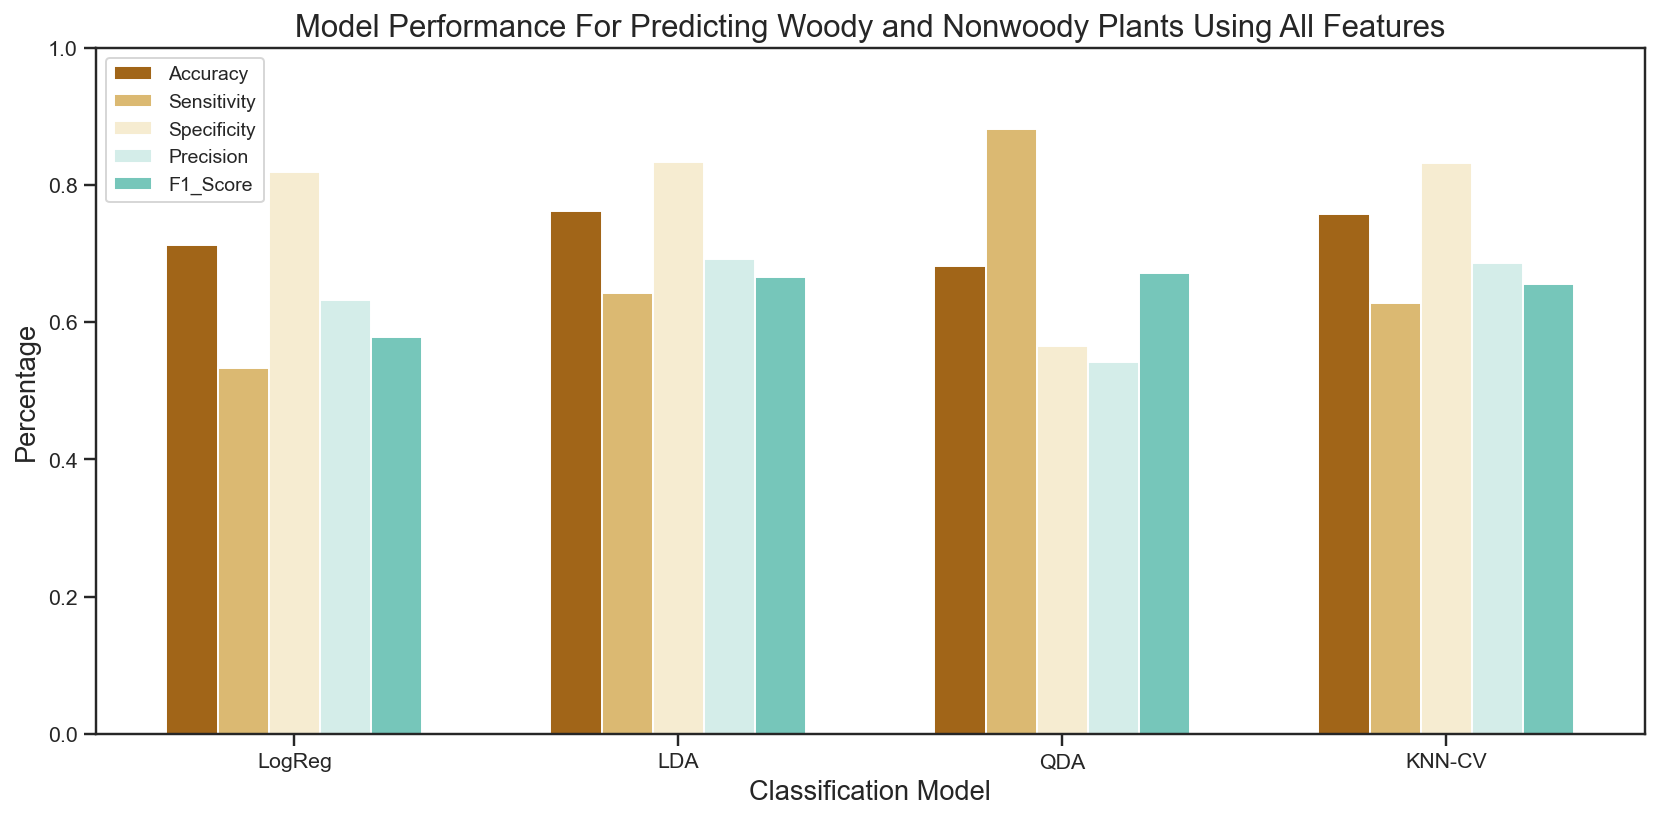

In [57]:
#Bar Graph
models = ['LogReg', 'LDA', 'QDA', 'KNN-CV']
print(models)
accuracies = statallfeatures_dic["Accuracy"]
print("Accuracies" + str(accuracies))
sensitivities = statallfeatures_dic["Sensitivity"]
print("Sen" + str(sensitivities))
specificities = statallfeatures_dic["Specificity"]
print("Spec" + str(specificities))
precisions = statallfeatures_dic["Precision"]
print("P" + str(precisions))
f1_scores = statallfeatures_dic["F1_Score"]
print("F1" + str(f1_scores))

x = 6*np.arange(len(models))
width = 0.8

fig, ax = plt.subplots(figsize=(12, 6))
import seaborn as sns
colors = sns.color_palette("BrBG")

acc = ax.bar(x-width*2, accuracies, width, label='Accuracy', color=colors[0])
sen = ax.bar(x-width, sensitivities, width, label='Sensitivity', color=colors[1])
spe = ax.bar(x,specificities, width, label='Specificity', color=colors[2])
pre = ax.bar(x+width, precisions, width, label='Precision', color=colors[3])
f1 = ax.bar(x+width*2 , f1_scores, width, label='F1_Score', color=colors[4])

ax.set_xlabel('Classification Model', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Model Performance For Predicting Woody and Nonwoody Plants Using All Features', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set(ylim=(0.0, 1))


fig.tight_layout()

plt.legend(loc="upper left", prop={'size': 10})
plt.show()

fig.savefig('AllFeaturesPerformance.png')

#Code from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

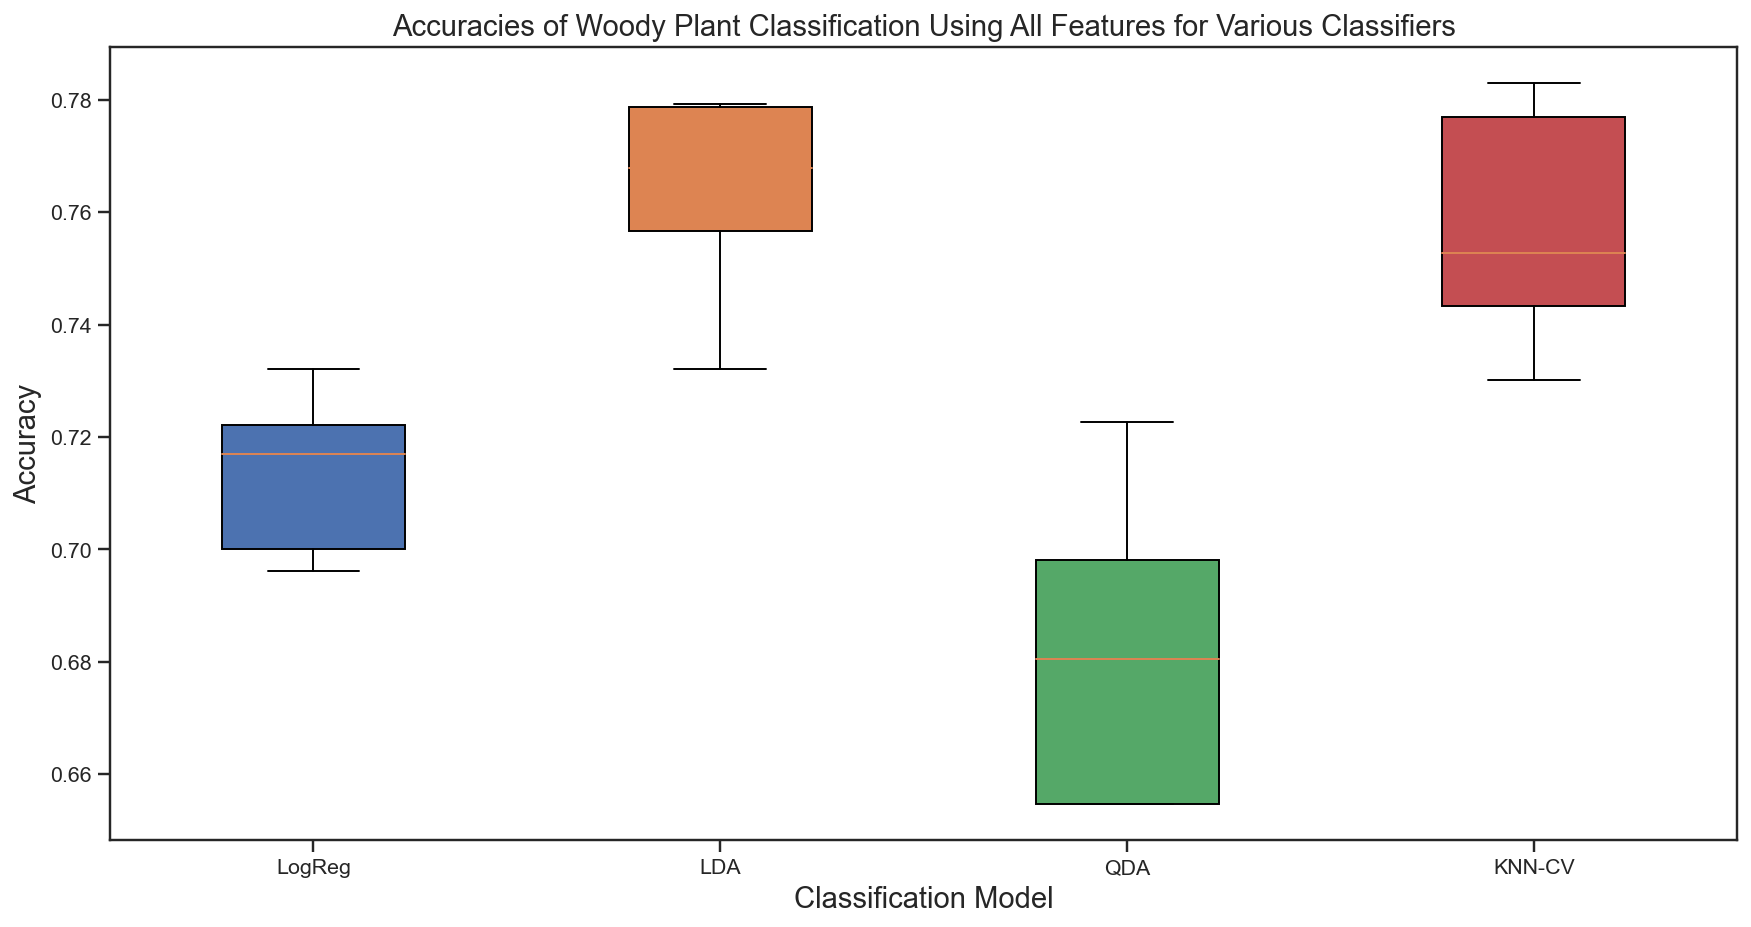

In [61]:
#Box Plot Accuracies

models = ['LogReg', 'LDA', 'QDA', 'KNN-CV']

x = np.arange(len(models))+1

LogRegAcc = indaccs_dic['LogReg']
LDAAcc = indaccs_dic['LDA']
QDAAcc = indaccs_dic['QDA']
KNNAcc = indaccs_dic['KNN']

data = [LogRegAcc, LDAAcc, QDAAcc, KNNAcc]

fig, ax = plt.subplots(figsize = (15,7.5))
bplot = ax.boxplot(data, patch_artist = True)

ax.set_title('Accuracies of Woody Plant Classification Using All Features for Various Classifiers', fontsize=15)
ax.set_xlabel('Classification Model', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(models)

import seaborn as sns
#colors = sns.color_palette("colorblind")
colors = sns.color_palette()

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.show()

In [60]:

#print("Log reg act: " + str())
print("Log reg pred: " + str(FWClog))
#print("QDA act: " + str(needed2))
print("QDA pred: " + str(FWCqda))
#print("LDA act: " + str(needed3))
print("LDA pred: " + str(FWClda))
#print("KNN act: " + str(needed4))
print("KNN pred: " +str(FWCknn))


Log reg pred: 70.97474946877419
QDA pred: 66.29526956804585
LDA pred: 62.881457461927056
KNN pred: 73.58529419431059
